# Data Cleaning

In [1]:
import pandas as pd
from collections import defaultdict, Counter
import os
import matplotlib.pyplot as plt

In [2]:
#Full CSV Files
rainfall =pd.read_csv("../data/rainfall_data.csv")
air_temperature = pd.read_csv("../data/air-temperature-table.csv")
wind_speed = pd.read_csv("../data/wind-speed-table.csv")
relative_humidity = pd.read_csv("../data/relative-humidity-table.csv")
lightning_risk_16S = pd.read_csv("../data/lightning_risk_data/lightning_risk_data_per_min_16S.csv") # Output
input_data_dfs = [rainfall, air_temperature, wind_speed, relative_humidity]

In [3]:
rainfall.head()

,Timestamp,S06,S07,S08,S100,S102,S104,S106,S107,S108,...,S81,S82,S84,S88,S89,S90,S900,S91,S92,S94
0,2020-04-20 15:40:00+08:00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-04-20 15:45:00+08:00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-04-20 15:50:00+08:00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-20 15:55:00+08:00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-20 16:00:00+08:00,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
air_temperature.head()

,Timestamp,Date,Time,S06,S100,S102,S104,S106,S107,S108,...,S115,S116,S117,S121,S122,S24,S43,S44,S50,S60
0,2020-04-20T22:20:00+08:00,2020-04-20,22:20:00,NaN,29.7,NaN,28.9,28.9,29.4,29.7,...,30.1,29.9,30.2,29.3,28.7,28.9,29.6,28.8,29.1,NaN
1,2020-04-20T22:21:00+08:00,2020-04-20,22:21:00,NaN,29.7,NaN,28.9,28.8,29.4,29.7,...,30.1,NaN,30.2,29.3,28.7,28.9,29.6,28.9,29.1,NaN
2,2020-04-20T22:22:00+08:00,2020-04-20,22:22:00,NaN,29.7,NaN,29.0,28.8,29.4,29.7,...,30.1,29.9,30.2,29.3,28.7,28.9,NaN,NaN,29.1,NaN
3,2020-04-20T22:23:00+08:00,2020-04-20,22:23:00,NaN,29.6,NaN,29.0,28.8,29.4,29.7,...,30.1,29.9,30.2,29.4,28.7,28.9,29.6,NaN,29.1,NaN
4,2020-04-20T22:24:00+08:00,2020-04-20,22:24:00,NaN,29.6,NaN,29.0,28.9,29.4,29.7,...,30.1,29.9,30.2,29.4,28.7,28.9,29.6,28.8,29.1,NaN


In [5]:
wind_speed.head()

,Timestamp,Date,Time,S06,S100,S102,S104,S106,S107,S108,...,S115,S116,S117,S121,S122,S24,S43,S44,S50,S60
0,2020-04-20T22:20:00+08:00,2020-04-20,22:20:00,NaN,3.7,NaN,11.0,3.1,3.3,4.3,...,3.1,13.2,6.3,NaN,2.8,5.3,5.4,3.5,2.3,NaN
1,2020-04-20T22:21:00+08:00,2020-04-20,22:21:00,NaN,3.8,NaN,10.9,3.0,3.3,4.2,...,3.3,NaN,5.9,NaN,3.2,5.3,5.5,3.3,2.2,NaN
2,2020-04-20T22:22:00+08:00,2020-04-20,22:22:00,NaN,4.0,NaN,10.7,2.8,3.4,4.2,...,3.3,13.0,5.5,NaN,3.4,5.4,NaN,NaN,2.2,NaN
3,2020-04-20T22:23:00+08:00,2020-04-20,22:23:00,NaN,4.1,NaN,11.0,2.8,3.4,4.3,...,3.5,13.0,5.4,NaN,3.5,5.4,5.3,NaN,2.2,NaN
4,2020-04-20T22:24:00+08:00,2020-04-20,22:24:00,NaN,4.1,NaN,11.1,2.7,3.4,4.3,...,3.7,13.0,5.3,NaN,3.3,5.5,5.5,3.9,2.2,NaN


In [6]:
relative_humidity.head()

,Timestamp,Date,Time,S06,S100,S102,S104,S106,S107,S108,...,S115,S116,S117,S121,S122,S24,S43,S44,S50,S60
0,2020-04-20T22:20:00+08:00,2020-04-20,22:20:00,NaN,74.8,NaN,77.2,78.9,79.3,74.7,...,70.6,81.7,74.1,77.9,78.6,77.3,77.7,77.9,78.1,NaN
1,2020-04-20T22:21:00+08:00,2020-04-20,22:21:00,NaN,74.8,NaN,77.4,79.2,78.8,74.7,...,70.9,NaN,74.3,77.9,71.2,77.4,77.8,77.7,78.3,NaN
2,2020-04-20T22:22:00+08:00,2020-04-20,22:22:00,NaN,74.8,NaN,77.3,79.3,79.0,74.7,...,70.9,81.8,74.6,78.3,63.1,77.5,NaN,NaN,78.3,NaN
3,2020-04-20T22:23:00+08:00,2020-04-20,22:23:00,NaN,74.9,NaN,77.2,79.1,79.3,74.7,...,71.0,81.8,75.0,78.5,NaN,77.6,77.9,NaN,78.5,NaN
4,2020-04-20T22:24:00+08:00,2020-04-20,22:24:00,NaN,75.0,NaN,77.5,79.0,79.2,74.7,...,71.1,81.6,75.5,78.2,NaN,77.6,77.9,78.2,78.6,NaN


In [7]:
lightning_risk_16S.head()

,DateTime,16S
0,2020-04-20 00:08:00+08:00,False
1,2020-04-20 00:09:00+08:00,False
2,2020-04-20 00:10:00+08:00,False
3,2020-04-20 00:11:00+08:00,False
4,2020-04-20 00:12:00+08:00,False


Based on the above, the largest data resolution for the datasets is 5 mins. Hence, we keep our data in 5 min intervals.

In [8]:
# Columns to exclude
exclude_cols = {"Timestamp", "Date", "Time"}

# Count occurrences of each column in the DataFrames
column_counts = Counter()

for df in input_data_dfs:
    for col in df.columns:
        if col not in exclude_cols:
            column_counts[col] += 1

# Convert to DataFrame and sort in ascending order
column_counts_df = pd.DataFrame(column_counts.items(), columns=["Column", "Count"]).sort_values(by="Count")

count_dict = defaultdict(list)
for col, count in column_counts.items():
    count_dict[count].append(col)

# Convert to a regular dictionary (optional)
count_dict = dict(count_dict)

# Print result
print(count_dict.keys())
print([len(count_dict[key]) for key in count_dict.keys()])
print(count_dict)

dict_keys([4, 1])
[19, 62]
{4: ['S06', 'S100', 'S102', 'S104', 'S106', 'S107', 'S108', 'S109', 'S111', 'S115', 'S116', 'S117', 'S121', 'S122', 'S24', 'S43', 'S44', 'S50', 'S60'], 1: ['S07', 'S08', 'S11', 'S112', 'S113', 'S114', 'S118', 'S119', 'S120', 'S123', 'S201', 'S202', 'S203', 'S204', 'S205', 'S207', 'S208', 'S209', 'S210', 'S211', 'S212', 'S213', 'S214', 'S215', 'S216', 'S217', 'S218', 'S219', 'S220', 'S221', 'S222', 'S223', 'S224', 'S226', 'S227', 'S228', 'S229', 'S230', 'S29', 'S33', 'S35', 'S36', 'S40', 'S46', 'S61', 'S64', 'S66', 'S69', 'S71', 'S77', 'S78', 'S79', 'S81', 'S82', 'S84', 'S88', 'S89', 'S90', 'S900', 'S91', 'S92', 'S94']}


Based on above there are a 62 other stations that are not present on other files while 19 are present in all. Hence, we keep those 19 station ids.

In [9]:
station_ids = count_dict[4]
print(station_ids)

['S06', 'S100', 'S102', 'S104', 'S106', 'S107', 'S108', 'S109', 'S111', 'S115', 'S116', 'S117', 'S121', 'S122', 'S24', 'S43', 'S44', 'S50', 'S60']


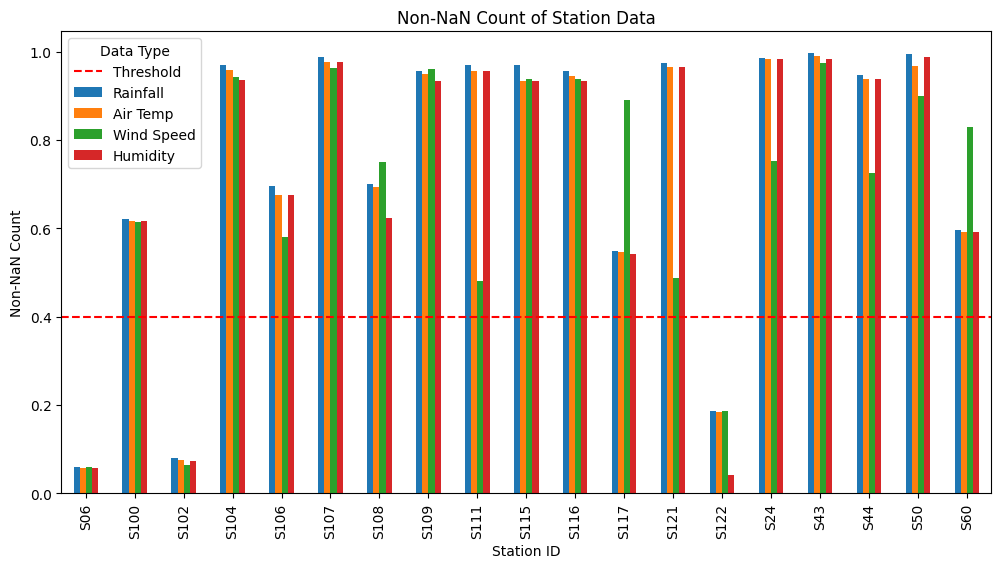

In [10]:
# List of DataFrames
input_data_dfs = [rainfall, air_temperature, wind_speed, relative_humidity]

# Dictionary to store non-NaN counts
non_nan_counts = {}

# Compute non-NaN counts for each station_id in each dataframe
for df_name, df in zip(["Rainfall", "Air Temp", "Wind Speed", "Humidity"], input_data_dfs):
    non_nan_counts[df_name] = df[station_ids].count() / df.shape[0]  # Normalized by row count


# Convert to DataFrame for visualization
non_nan_counts_df = pd.DataFrame(non_nan_counts)

# Plot bar chart
non_nan_counts_df.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Station ID")
plt.ylabel("Non-NaN Count")
plt.title("Non-NaN Count of Station Data")
plt.xticks(rotation=90)
threshold_value = 0.4  # Change this to your desired threshold
plt.axhline(y=threshold_value, color='r', linestyle='--', label="Threshold")
plt.legend(title="Data Type")
plt.show()




As you can see there are some stations with very minimal amount of data with various reasons. Hence, we drop these stations.

In [11]:
for station_to_drop in ["S06","S102","S122"]:
    station_ids.remove(station_to_drop)

In [42]:
def prepare_csv(df_raw, filename):
    df_raw["Timestamp"] = pd.to_datetime(df_raw["Timestamp"])
    
    # Extract only the required columns and filter out irrelevant stations
    selected_columns = ["Timestamp"] + station_ids
    df_selected = df_raw[selected_columns]

    # Interpolate data for short missing data
    df_filled = df_selected.interpolate(method='linear', limit=10, limit_direction='forward')

    # Filter rows where the minute is a multiple of 5
    df_filtered = df_filled[df_filled["Timestamp"].dt.minute % 5 == 0]

    output_path = os.path.join("../data/final_data", filename)
    print(f"{filename} is now saved at data/final_data.")
    df_filtered.to_csv(output_path, index=False)

In [43]:
for df_name, df in zip(["Rainfall", "Air Temp", "Wind Speed", "Humidity"], input_data_dfs):
    prepare_csv(df,df_name+".csv")

Rainfall.csv is now saved at data/final_data.
Air Temp.csv is now saved at data/final_data.
Wind Speed.csv is now saved at data/final_data.
Humidity.csv is now saved at data/final_data.


In [18]:
# Filter rows where the minute is a multiple of 5
lightning_risk_16S = lightning_risk_16S.rename(columns={"DateTime": "Timestamp"})
lightning_risk_16S["Timestamp"] = pd.to_datetime(lightning_risk_16S["Timestamp"])
df_filtered = lightning_risk_16S[lightning_risk_16S["Timestamp"].dt.minute % 5 == 0]
output_path = os.path.join("../data/final_data", "Lightning Risk 16S.csv")
df_filtered.to_csv(output_path, index=False)
print(f"{"Lightning Risk 16S.csv"} is now saved at data/final_data.")

Lightning Risk 16S.csv is now saved at data/final_data.
